<a href="https://colab.research.google.com/github/re2m/AI_contents/blob/main/c_customLoad_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

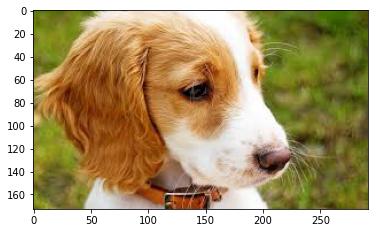

292 173


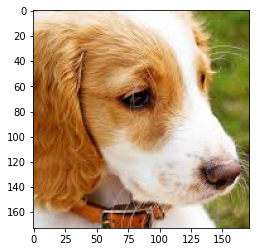

172 173
# of classes(클래스 개수): 2
클래스 이름: ['cats', 'dogs']
클래스별 인덱스: {'cats': 0, 'dogs': 1}
my_train 개수: 10


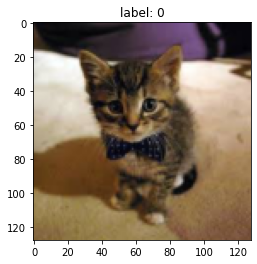

torch.Size([128, 128, 3])


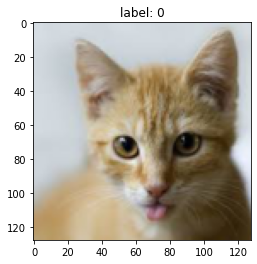

torch.Size([128, 128, 3])


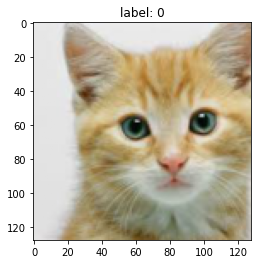

torch.Size([128, 128, 3])


In [13]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

from torch.autograd import Variable

from PIL import Image

imgsize = 128
img_dir = "drive/MyDrive/my_catdog/train/"

import os

def CropImgSquare(img):
  small_len = min(img.width, img.height)
  cx, cy = img.width/2, img.height/2
  d = small_len/2

  (left, upper, right, lower) = (cx-d, cy-d, cx+d, cy+d)
  img = img.crop((left, upper, right, lower))

  return img


dir = img_dir + "dogs/images (2).jpeg"
img = Image.open(dir)
plt.imshow(img)
plt.show()

print(img.width, img.height)

img = CropImgSquare(img)

plt.imshow(img)
plt.show()

print(img.width, img.height)

class MyImageFolder(Dataset):
  def __init__ (self, ipath,
                transform=transforms.ToTensor()): 
    self.classes, self.class_to_idx, self.length, self.flist, self.labels = MygetinfoFromFolder(ipath)
    
    self.root_dir = ipath
    self.transform=transform

  def __len__(self):
    return self.length

  def __getitem__(self, idx):
    img = Image.open(self.flist[idx])

    if (img.mode!="RGB"):
      img = img.convert(mode="RGB")
      
    img = CropImgSquare(img)
    img = self.transform(img)

    label = self.labels[idx]

    return img, label

my_train = MyImageFolder(img_dir,
                          transforms.Compose([transforms.Resize((imgsize, imgsize)),
                                              transforms.ToTensor()]
                                              ))

nclass = len(my_train.classes)
print("# of classes(클래스 개수): %d" %nclass)

print("클래스 이름:", my_train.classes)
print("클래스별 인덱스:", my_train.class_to_idx)
print("my_train 개수:", my_train.__len__())


for i in range(3):
  img = my_train[i][0]
  img = np.transpose(img, (1, 2, 0))

  plt.title("label: %d" %my_train[i][1])
  plt.imshow(img)
  plt.show()

  print(img.shape)